In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install panda

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [7]:
accident = pd.read_csv('Datasets\\accident_data.csv')

<h1>CONVERTING OBJECTS INTO CATEGORY</h1>

<h1>Converting Date Field into Data Time data type</h1>

In [8]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1>Converting Date Time to Time Date</h1>

In [10]:
#remove spaces 20 / 02/ 2025
accident['Accident Date'] = accident['Accident Date'].str.strip()
#replace / wit -
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [11]:
print(type(accident['Accident Date']))

<class 'pandas.core.series.Series'>


<h1>UniVariate</h1>

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors= 'coerce')

In [13]:
#extracting year data only
accident['Year'] = accident['Accident Date'].dt.year
#extracting month data only
accident['Month'] = accident['Accident Date'].dt.month
#extracting day data only
accident['Day'] = accident['Accident Date'].dt.day
#extracting day of week data only
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from scipy.stats import f_oneway

In [16]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

<h1>DATA INSIGHTS</h1>

<h1>/ Insight No. 1</h1>
<h2>In 2019, cars recorded the highest number of accidents, accounting for 71% of all incidents that year.</h2>

In [17]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [18]:
No_1 = accident[accident['Year'] == 2019]['Vehicle_Type'].value_counts()

In [19]:
No_1

Vehicle_Type
Car                                      130304
Bus or coach (17 or more pass seats)      10483
Van / Goods 3.5 tonnes mgw or under        9303
Motorcycle over 500cc                      7686
Goods 7.5 tonnes mgw and over              6247
Motorcycle 125cc and under                 4313
Taxi/Private hire car                      4230
Motorcycle over 125cc and up to 500cc      2446
Motorcycle 50cc and under                  2136
Goods over 3.5t. and under 7.5t            2049
Other vehicle                              1588
Agricultural vehicle                        636
Minibus (8 - 16 passenger seats)            625
Pedal cycle                                  68
Ridden horse                                  1
Data missing or out of range                  0
Name: count, dtype: int64

<h1>/ Insight No. 2</h1>
<h2>In 2019, 81% of accidents occurred under the weather condition "Fine, no high winds."</h2>

In [20]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [21]:
No_2 = accident[accident['Year'] == 2019]['Weather_Conditions'].value_counts()

In [22]:
No_2

Weather_Conditions
Fine no high winds       143876
Raining no high winds     22835
unaccounted                4134
Other                      4083
Raining + high winds       2959
Fine + high winds          2545
Fog or mist                 857
Snowing no high winds       680
Snowing + high winds        146
Name: count, dtype: int64

<h1>/ Insight No. 3</h1>
<h2>The vehicle type with the lowest number of accidents across all severity levels is ridden horses, 
with only 4 slight accidents and 0 fatal or serious accidents.</h2>

In [23]:
accident['Month'].value_counts().reset_index()

,Month,count
0,11,60424
1,10,59580
2,7,57445
3,6,56481
4,9,56455
5,5,56352
6,3,54086
7,8,53913
8,1,52872
9,12,51836


In [24]:
no_3 = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size()

In [25]:
no_3

Accident_Severity  Vehicle_Type                         
Fatal              Agricultural vehicle                         21
                   Bus or coach (17 or more pass seats)        325
                   Car                                        6577
                   Data missing or out of range                  0
                   Goods 7.5 tonnes mgw and over               216
                   Goods over 3.5t. and under 7.5t              67
                   Minibus (8 - 16 passenger seats)             29
                   Motorcycle 125cc and under                  189
                   Motorcycle 50cc and under                    95
                   Motorcycle over 125cc and up to 500cc       105
                   Motorcycle over 500cc                       339
                   Other vehicle                                70
                   Pedal cycle                                   6
                   Ridden horse                                  0
     

<h1>/ Insight No. 4</h1>
<h2>In 2020, accident severity records showed that 85% of incidents were classified as slight accidents, making them the most common type.</h2>

In [26]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [27]:
no_4 = accident[accident['Year'] == 2020]

In [28]:
no_4['Accident_Severity'].value_counts()

Accident_Severity
Slight     145129
Serious     23121
Fatal        2341
Name: count, dtype: int64

<h1>Insight No. 5</h1>
<h2>The road condition during accidents was most severe in fatal cases, while the lowest number of incidents occurred during the snow season.</h2>

In [29]:
no_5 = accident[accident['Accident_Severity'] == 'Fatal'] ['Road_Surface_Conditions'].value_counts()

In [30]:
no_5

Road_Surface_Conditions
Dry                       5788
Wet or damp               2620
Frost or ice               193
Snow                        35
Flood over 3cm. deep        23
unknown road condition       2
Name: count, dtype: int64

<h1>Insight No. 6</h1>
<h2>Serious accidents predominantly occurred on dry road surfaces, with a recorded total of 61,708 incidents.</h2>

In [31]:
no_6 = accident[accident['Accident_Severity'] == 'Serious'] ['Road_Surface_Conditions'].value_counts()

In [32]:
no_6

Road_Surface_Conditions
Dry                       61638
Wet or damp               23785
Frost or ice               2007
Snow                        565
Flood over 3cm. deep        152
unknown road condition       70
Name: count, dtype: int64

<h1>Insight No. 7</h1>
<h2>Each road type has the highest number of recorded accidents. However, 
in Dual Carriageways, there are 78,677 accidents reported under "Fine, No High Winds" weather conditions.</h2>

In [33]:
no_7 = accident.groupby(['Road_Type', 'Weather_Conditions']).size()

In [34]:
no_7

Road_Type           Weather_Conditions   
Dual carriageway    Fine + high winds          1519
                    Fine no high winds        76916
                    Fog or mist                 682
                    Other                      2264
                    Raining + high winds       2033
                    Raining no high winds     13044
                    Snowing + high winds        185
                    Snowing no high winds      1020
                    unaccounted                1761
One way street      Fine + high winds           158
                    Fine no high winds        11057
                    Fog or mist                  29
                    Other                       309
                    Raining + high winds        153
                    Raining no high winds      1429
                    Snowing + high winds         14
                    Snowing no high winds        78
                    unaccounted                 332
Roundabout          Fi

<h1>Insight No. 8</h1>
<h2>The highest number of accidents (356,085 cases) occurred in daylight on dry roads, suggesting that high traffic volume contributes more to accidents than poor visibility or hazardous conditions.</h2>

In [35]:
no_8 = accident.groupby(['Light_Conditions', 'Road_Surface_Conditions']).size()

In [36]:
no_8

Light_Conditions             Road_Surface_Conditions
Darkness - lighting unknown  Dry                          4396
                             Flood over 3cm. deep           15
                             Frost or ice                  249
                             Snow                          105
                             Wet or damp                  1675
                             unknown road condition         44
Darkness - lights lit        Dry                         70368
                             Flood over 3cm. deep          160
                             Frost or ice                 4621
                             Snow                         1587
                             Wet or damp                 52463
                             unknown road condition        136
Darkness - lights unlit      Dry                          1353
                             Flood over 3cm. deep            4
                             Frost or ice                  130
  

<h1>Insight No. 9</h1>
<h2>The lowest number of accidents occurred in unallocated areas, with only 10 slight, 1 serious, and 0 fatal cases, suggesting minimal or unclassified traffic activity in these locations.</h2>

In [37]:
no_9 = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

In [38]:
no_9

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               196077
                     Serious               37312
                     Fatal                  5601
Unallocated          Slight                   10
                     Serious                   1
                     Fatal                     0
Urban                Slight               367714
                     Serious               50904
                     Fatal                  3060
Name: count, dtype: int64

<h1>Insight No. 10</h1>
<h2>The mid-range accident count occurred on frost or ice-covered roads, with 193 fatal, 2,007 serious, and 16,317 slight accidents, indicating that icy conditions pose a significant risk but are less common than dry or wet road accidents. </h2>

In [39]:
no_10 = accident.groupby(['Accident_Severity', 'Road_Surface_Conditions']).size()

In [40]:
no_10

Accident_Severity  Road_Surface_Conditions
Fatal              Dry                          5788
                   Flood over 3cm. deep           23
                   Frost or ice                  193
                   Snow                           35
                   Wet or damp                  2620
                   unknown road condition          2
Serious            Dry                         61638
                   Flood over 3cm. deep          152
                   Frost or ice                 2007
                   Snow                          565
                   Wet or damp                 23785
                   unknown road condition         70
Slight             Dry                        380395
                   Flood over 3cm. deep          842
                   Frost or ice                16317
                   Snow                         5290
                   Wet or damp                160303
                   unknown road condition        654
dty

<h1>Insight No. 11</h1>
<h2>The mid-range road type in terms of accident frequency is roundabouts, with 15,545 accidents in rural areas and 28,446 in urban areas, indicating moderate accident occurrence compared to single and dual carriageways but still posing risks due to merging traffic and navigation challenges. </h2>

In [41]:
no_11 = accident.groupby(['Road_Type', 'Urban_or_Rural_Area']).size()

In [42]:
no_11

Road_Type           Urban_or_Rural_Area
Dual carriageway    Rural                   48715
                    Unallocated                 1
                    Urban                   50708
One way street      Rural                    1193
                    Unallocated                 0
                    Urban                   12366
Roundabout          Rural                   15545
                    Unallocated                 1
                    Urban                   28446
Single carriageway  Rural                  168010
                    Unallocated                 9
                    Urban                  324124
Slip road           Rural                    4294
                    Unallocated                 0
                    Urban                    2747
unaccounted         Rural                    1233
                    Unallocated                 0
                    Urban                    3287
dtype: int64

<h1>Insight No. 12</h1>
<h2>Most frost/ice accidents occurred on single carriageways (14,918 cases), while the fewest were on unaccounted roads (85 cases), showing higher risk on major roads.</h2>

In [43]:
no_12 = accident[accident['Road_Surface_Conditions'] == 'Frost or ice'] ['Road_Type'].value_counts()

In [44]:
no_12

Road_Type
Single carriageway    14918
Dual carriageway       2408
Roundabout              745
One way street          183
Slip road               178
unaccounted              85
Name: count, dtype: int64

<h1>Insight No. 13</h1>
<h2>Cars had the most accidents (337,311 cases), while ridden horses and missing data had the fewest (3 cases each), highlighting cars' high exposure and minimal incidents for rare vehicle types. </h2>

In [45]:
no_13 = accident[accident['Road_Surface_Conditions'] == 'Dry'] ['Vehicle_Type'].value_counts()

In [46]:
no_13

Vehicle_Type
Car                                      337311
Van / Goods 3.5 tonnes mgw or under       23082
Bus or coach (17 or more pass seats)      17604
Motorcycle over 500cc                     17438
Goods 7.5 tonnes mgw and over             11690
Motorcycle 125cc and under                10485
Taxi/Private hire car                      9014
Motorcycle over 125cc and up to 500cc      5225
Motorcycle 50cc and under                  5189
Goods over 3.5t. and under 7.5t            4136
Other vehicle                              3845
Minibus (8 - 16 passenger seats)           1355
Agricultural vehicle                       1303
Pedal cycle                                 138
Data missing or out of range                  3
Ridden horse                                  3
Name: count, dtype: int64

<h1>Insight No. 14</h1>
<h2>In 2021, 76% of accidents (125,348 out of 163,554) occurred on dry roads, indicating that high traffic volume and driver behavior contribute more to accidents than adverse weather conditions.  </h2>

In [47]:
accident['Year'].value_counts().reset_index()

,Year,count
0,2019,182115
1,2020,170591
2,2021,163554
3,2022,144419


In [48]:
no_14 = accident[accident['Year'] == 2019]['Road_Surface_Conditions'].value_counts() 

In [49]:
no_14

Road_Surface_Conditions
Dry                       125348
Wet or damp                53153
Frost or ice                2569
Snow                         534
Flood over 3cm. deep         312
unknown road condition       199
Name: count, dtype: int64

<h1>Insight No. 15</h1>
<h2>Saturday had the most accidents (107,178 cases), while Monday had the fewest (72,680 cases), suggesting higher accident rates on weekends, possibly due to increased travel and leisure activities.</h2>

In [50]:
no_15 = accident['Accident Date'].dt.day_name().value_counts()

In [51]:
no_15

Accident Date
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

<h1>Insight No. 16</h1>
<h2>Under darkness - lights lit, Birmingham recorded the most accidents (9,819 cases), while Clackmannanshire had the fewest (69 cases), indicating higher accident risks in major urban areas.</h2>

In [52]:
no_16 = accident[accident['Light_Conditions'] != 'Darkness - lights lit']['District Area'].value_counts()

In [53]:
no_16

District Area
Birmingham                   9819
Leeds                        6906
Manchester                   4842
Bradford                     4724
Sheffield                    4351
                             ... 
Clackmannshire                138
London Airport (Heathrow)     126
Shetland Islands              123
Orkney Islands                105
Clackmannanshire               69
Name: count, Length: 422, dtype: int64

<h1>Insight No. 17</h1>
<h2>The highest number of accidents occurred in the year 2019, recording a total of 114,552 incidents, with the majority taking place in urban areas.</h2>

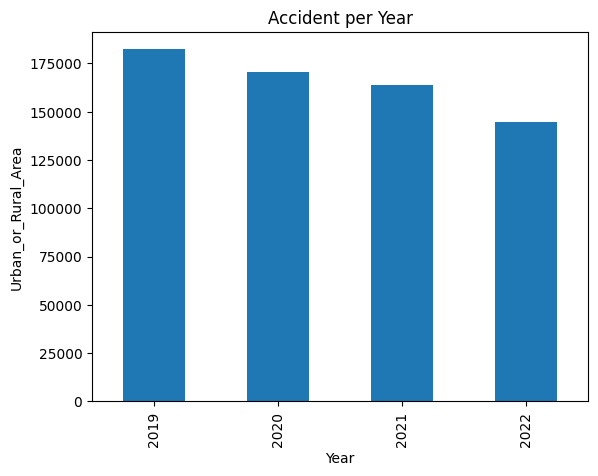

In [54]:
acc_month = accident['Year'].value_counts().sort_index()
acc_month.plot(kind='bar')
plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Urban_or_Rural_Area')
plt.show()

In [55]:
no_17 = accident.groupby(['Year', 'Urban_or_Rural_Area']).size().reset_index()

In [56]:
no_17

,Year,Urban_or_Rural_Area,0
0,2019,Rural,67558
1,2019,Unallocated,5
2,2019,Urban,114552
3,2020,Rural,61991
4,2020,Unallocated,6
5,2020,Urban,108594
6,2021,Rural,59016
7,2021,Unallocated,0
8,2021,Urban,104538
9,2022,Rural,50425


<h1>Insight No. 18</h1>
<h2>In 2022, 46% of serious accidents (66,461 out of 144,419) involved cars, making them the most affected vehicle type in severe crashes. </h2>

In [57]:
accident['Year'].value_counts().reset_index()

,Year,count
0,2019,182115
1,2020,170591
2,2021,163554
3,2022,144419


In [58]:
no_18 = accident[accident['Accident_Severity'] == 'Serious']['Vehicle_Type'].value_counts()

In [59]:
no_18

Vehicle_Type
Car                                      66461
Van / Goods 3.5 tonnes mgw or under       4554
Motorcycle over 500cc                     3457
Bus or coach (17 or more pass seats)      3373
Goods 7.5 tonnes mgw and over             2321
Motorcycle 125cc and under                2031
Taxi/Private hire car                     1771
Motorcycle 50cc and under                 1014
Motorcycle over 125cc and up to 500cc     1014
Goods over 3.5t. and under 7.5t            857
Other vehicle                              767
Agricultural vehicle                       282
Minibus (8 - 16 passenger seats)           276
Pedal cycle                                 39
Data missing or out of range                 0
Ridden horse                                 0
Name: count, dtype: int64

<h1>Insight No. 19</h1>
<h2>The Single Carriageway road type recorded the highest number of accidents, reaching 672 incidents, particularly under conditions of floodwaters exceeding 3cm in depth.</h2>

In [64]:
no_19 = accident[accident['Road_Surface_Conditions'] == 'Flood over 3cm. deep'] ['Road_Type'].value_counts()

In [65]:
no_19

Road_Type
Single carriageway    672
Dual carriageway      302
Roundabout             22
Slip road               9
unaccounted             7
One way street          5
Name: count, dtype: int64

<h1>Insight No. 20</h1>
<h2>In Urban Areas, the weather condition classified as "Other" recorded a total of 9,813 accidents, making it a significant contributing factor.s</h2>

In [62]:
no_20 = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Weather_Conditions'].value_counts()

In [63]:
no_20

Weather_Conditions
Fine no high winds       339088
Raining no high winds     48518
unaccounted               10162
Other                      9813
Raining + high winds       4892
Fine + high winds          4560
Snowing no high winds      3188
Fog or mist                1143
Snowing + high winds        314
Name: count, dtype: int64